## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x_vals = np.linspace(0,20).reshape(-1,1)
y_vals = -2*x_vals + 1

In [3]:
x_vals.shape , y_vals.shape

((50, 1), (50, 1))

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def intialize_params(X):
    theta0 = 0
    theta1 = 0
    m = X.shape[0]
    
    return theta0,theta1,m

def hyp(theta_0,theta_1,X):
    return theta_0 + theta_1*X

def compute_cost(theta0,theta1,X,Y,m):
    return (1/(2*m))*np.sum((hyp(theta0,theta1,X)-Y)**2)

def grads(theta0,theta1,X,Y,m):
    dtheta0 = (1/m)*np.sum(hyp(theta0,theta1,X)-Y)
    dtheta1 = float((1/m)*X.T.dot(hyp(theta0,theta1,X)-Y))
    
    return dtheta0,dtheta1

def update_params(theta0,theta1,learning_rate,dtheta0,dtheta1):
    theta0 = theta0 - learning_rate*dtheta0;
    theta1 = theta1 - learning_rate*dtheta1;
    
    return theta0, theta1

In [5]:
def fit_model(X,y,lr,tolerance):
    #intialize params
    theta0,theta1,m = intialize_params(X)
    
    # values for plotting
    costs = []
    theta0_list = []
    theta1_list = []
    all_hyp = []
    iters =0

    while(True):
        
        all_hyp.append(hyp(theta0,theta1,X))
        # 1-calculate loss
        cost_old = compute_cost(theta0,theta1,X,y,m)
        # 2-calculate grads
        dtheta0,dtheta1 = grads(theta0,theta1,X,y,m)
        # 3-update params
        theta0 , theta1 = update_params(theta0,theta1,lr,dtheta0,dtheta1)
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        # calculate cost after update
        cost_new = compute_cost(theta0,theta1,X,y,m)
        costs.append(cost_new)
        
        iters += 1
        if(abs(cost_old-cost_new)<=tolerance):
            break
        
        return_dict = {
            "theta0":theta0,
            "theta1":theta1,
            "costs":costs,
            "theta0_list":theta0_list,
            "theta1_list":theta1_list,
            "iters":iters
        }
    return return_dict



#### Try your function with any input parameterss of your choice.

In [6]:
result = fit_model(x_vals,y_vals,0.001,1e-4)

#### Calculate r2 score

In [7]:
def predict(x_point,theta0,theta1):
    return hyp(theta0,theta1,x_point)
predictions = predict(x_vals,result["theta0"],result["theta1"])

In [8]:
from sklearn.metrics import r2_score
r2_score(predictions,y_vals)

0.997428488059943

#### Plot loss vs. epochs

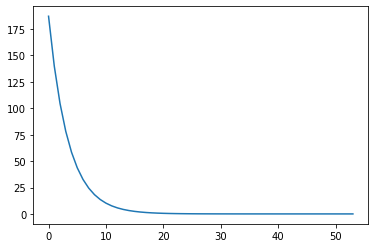

In [9]:
iters,costs = result["iters"],result["costs"]
iterations = np.arange(0,iters+1)

plt.plot(iterations,costs);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

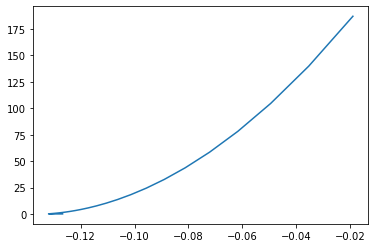

In [10]:
plt.plot(result["theta0_list"],result["costs"]);

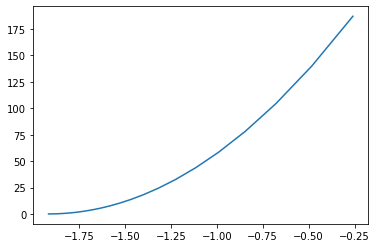

In [11]:
plt.plot(result["theta1_list"],result["costs"]);

#### Plot all regression lines till converge

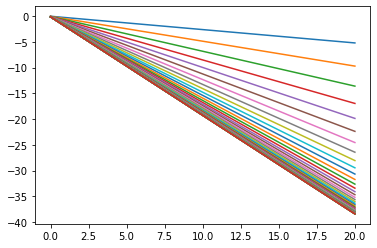

In [12]:
plot_x = np.linspace(0,20,20)
for i in range(len(result["theta0_list"])):
    plot_y = hyp(result["theta0_list"][i],result["theta1_list"][i],plot_x)
    plt.plot(plot_x,plot_y)

#### Plot the best regression line

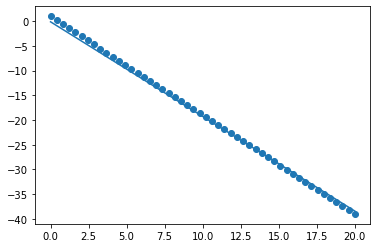

In [15]:
plt.scatter(x_vals,y_vals)

plot_y = hyp(result["theta0"],result["theta1"],x_vals)
plt.plot(x_vals,plot_y);

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [16]:
result2 = fit_model(x_vals,y_vals,0.0001,1e-4)

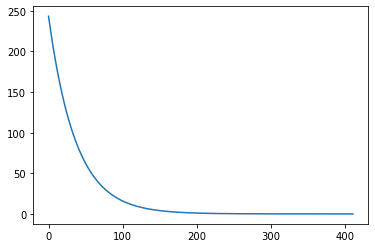

In [17]:
iters2,costs2 = result2["iters"],result2["costs"]
iterations2 = np.arange(0,iters2+1)

plt.plot(iterations2,costs2);

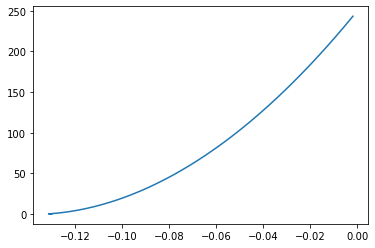

In [18]:
plt.plot(result2["theta0_list"],result2["costs"]);

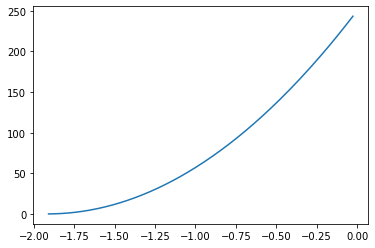

In [19]:
plt.plot(result2["theta1_list"],result2["costs"]);

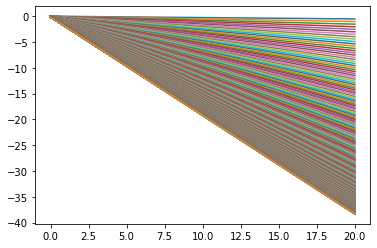

In [20]:
plot_x2 = np.linspace(0,20,20)
for i in range(len(result2["theta0_list"])):
    plot_y2 = hyp(result2["theta0_list"][i],result2["theta1_list"][i],plot_x)
    plt.plot(plot_x2,plot_y2)

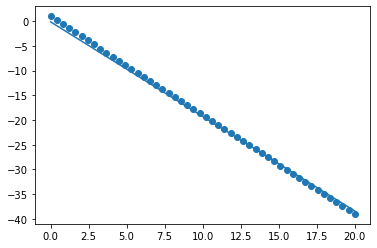

In [21]:
plt.scatter(x_vals,y_vals)
plot_x = np.linspace(0,20,20)
plot_y = hyp(result["theta0"],result["theta1"],plot_x)
plt.plot(plot_x,plot_y);

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [96]:
def mini_batch(X,Y,lr,tolerance,n_batches):
    theta0,theta1,m = intialize_params(X)
    
    iters = 0
    costs = []
    theta0_list = []
    theta1_list = []
    all_hyp = []
    batch_size = int(len(X)/n_batches)

    while(True):
         
        all_hyp.append(hyp(theta0,theta1,X))
        
        batch_index = np.random.randint(0,len(X-1),batch_size)
        x_batch = np.take(X,batch_index)
        y_batch = np.take(Y,batch_index)
        for _ in range(batch_size):
            cost_old = compute_cost(theta0,theta1,x_batch,y_batch,m)

            dtheta0 ,dtheta1 = grads(theta0,theta1,X,Y,m)
            theta0,theta1 = update_params(theta0,theta1,lr,dtheta0,dtheta1)

            cost_new = compute_cost(theta0,theta1,x_batch,y_batch,m)
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        costs.append(cost_new)
        iters += 1 
        if(np.linalg.norm(np.array([dtheta0,dtheta1]))<=tolerance):
            break
        elif((cost_old-cost_new)<=tolerance):
            break
            
        return_dict = {
            "theta0":theta0,
            "theta1":theta1,
            "costs":costs,
            "theta0_list":theta0_list,
            "theta1_list":theta1_list,
            "iters":iters
        }
    return return_dict

In [97]:
mini_batch_results = mini_batch(x_vals,y_vals,0.001,1e-5,2)

In [98]:
mini_batch_results["theta0"],mini_batch_results["theta1"]

(0.2513980222245629, -1.9443160745610526)

#### Plot loss vs. epochs

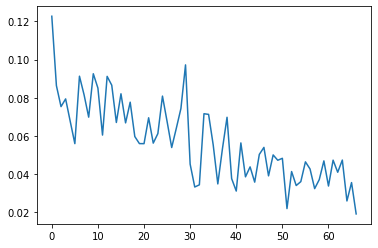

In [100]:
iters,costs = mini_batch_results["iters"],mini_batch_results["costs"]
iterations = np.arange(0,iters+1)

plt.plot(iterations,costs);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

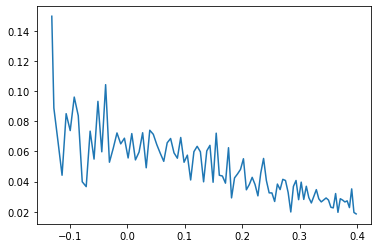

In [72]:
plt.plot(mini_batch_results["theta0_list"],mini_batch_results["costs"]);

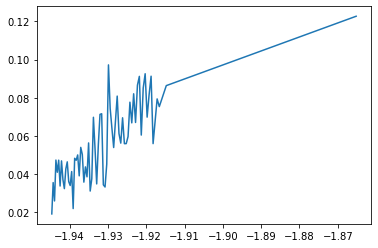

In [101]:
plt.plot(mini_batch_results["theta1_list"],mini_batch_results["costs"]);

### all regression lines

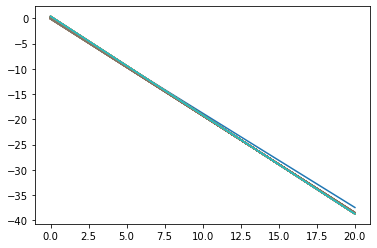

In [73]:
for i in range(len(mini_batch_results["theta0_list"])):
    plot_y = hyp(mini_batch_results["theta0_list"][i],mini_batch_results["theta1_list"][i],x_vals)
    plt.plot(x_vals,plot_y)

### best line fit

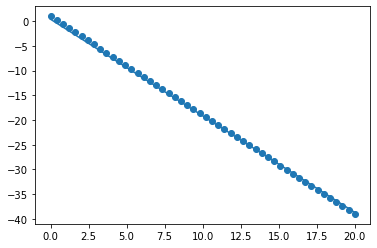

In [74]:
plt.scatter(x_vals,y_vals)

plot_y = hyp(mini_batch_results["theta0"],mini_batch_results["theta1"],x_vals)
plt.plot(x_vals,plot_y);

In [75]:
predictions = predict(x_vals,mini_batch_results["theta0"],mini_batch_results["theta1"])

In [76]:
r2_score(predictions,y_vals)

0.9992866321359437

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [43]:
def grads_stocastic(theta0,theta1,X,Y):
    dtheta0 = hyp(theta0,theta1,X)-Y
    dtheta1 = (hyp(theta0,theta1,X)-Y)*X

    return dtheta0,dtheta1

In [50]:
def stocastic(X,Y,lr,tolerance):
    theta0,theta1,m = intialize_params(X)
    
    iters = 0
    costs = []
    theta0_list = []
    theta1_list = []
    all_hyp = []
    while(True):
        
        all_hyp.append(hyp(theta0,theta1,X))
            
        index = np.random.randint(0, len(X)) # random sample
            
        Xs = np.take(X, index)
        ys = np.take(Y, index)

        cost_old = compute_cost(theta0,theta1,Xs,ys,1)
        
        dtheta0 ,dtheta1 = grads_stocastic(theta0,theta1,Xs,ys)
        theta0,theta1 = update_params(theta0,theta1,lr,dtheta0,dtheta1)
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        cost_new = compute_cost(theta0,theta1,Xs,ys,1)   
        
        costs.append(cost_new)
        
        iters +=1
        
        if((cost_old-cost_new)<=tolerance):
            break
            
    return_dict = {
            "theta0":theta0,
            "theta1":theta1,
            "costs":costs,
            "theta0_list":theta0_list,
            "theta1_list":theta1_list,
            "iters":iters
        }
        
    return return_dict

In [61]:
result_stocaastic = stocastic(x_vals,y_vals,0.001,1e-4)
result_stocaastic["iters"]

24

#### Plot loss vs. epochs

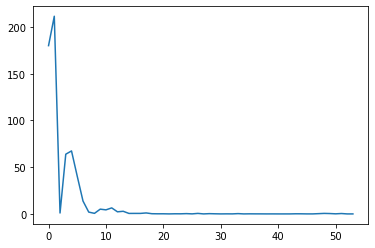

In [55]:
iters,costs = result_stocaastic["iters"],result_stocaastic["costs"]
iterations = np.arange(0,iters)

plt.plot(iterations,costs);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

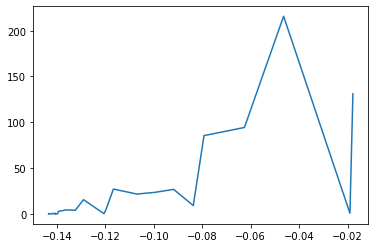

In [102]:
plt.plot(result_stocaastic["theta0_list"],result_stocaastic["costs"]);

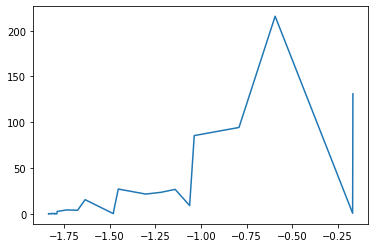

In [103]:
plt.plot(result_stocaastic["theta1_list"],result_stocaastic["costs"]);

#### Plot all regression lines till converge

IndexError: list index out of range

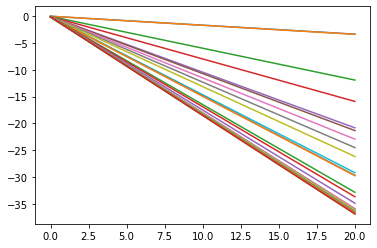

In [104]:
for i in range(len(result["theta0_list"])):
    plot_y = hyp(result_stocaastic["theta0_list"][i],result_stocaastic["theta1_list"][i],x_vals)
    plt.plot(x_vals,plot_y)

#### Plot the best regression line

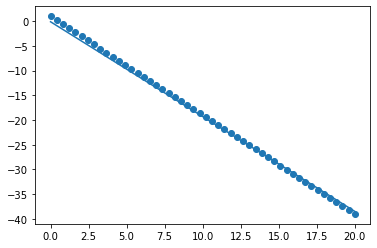

In [59]:
plt.scatter(x_vals,y_vals)

plot_y = hyp(result_stocaastic["theta0"],result_stocaastic["theta1"],x_vals)
plt.plot(x_vals,plot_y);

In [60]:
predictions = predict(x_vals,result_stocaastic["theta0"],result_stocaastic["theta1"])
r2_score(predictions,y_vals)

0.9974790027368009